<a href="https://colab.research.google.com/github/savastakan/codes/blob/main/Hitit_Xception_32label_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib
data_directory = pathlib.Path("/content/drive/MyDrive/Projeler/hitit_projesi/subdataset")

Found 3117 files belonging to 32 classes.
Using 2494 files for training.
Found 3117 files belonging to 32 classes.
Using 623 files for validation.


In [ ]:
model = Sequential()
n_classes = 32
pretrained_model= tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(280,280,3),
    pooling='avg',
    classes=n_classes,
    classifier_activation="softmax",
)

for each_layer in pretrained_model.layers:
        each_layer.trainable=False

model.add(pretrained_model)

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(n_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

img_height,img_width=280, 280
batch_size=32

datagen = ImageDataGenerator(
    fill_mode="wrap",
    horizontal_flip=True,
    height_shift_range=0.1,
    width_shift_range=0.1,
    brightness_range=(0.5,1.5),
    zoom_range = [1, 1.5],
)

train_generator = datagen.flow_from_directory(
    directory=data_directory,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

validation_generator = datagen.flow_from_directory(
    directory=data_directory,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Found 3117 images belonging to 32 classes.
Found 3117 images belonging to 32 classes.


<ipython-input-31-5f2a144eb778>:36: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,


Epoch 1/10
14/97 [===>..........................] - ETA: 1:29 - loss: 3.3312 - accuracy: 0.0938

KeyboardInterrupt: ignored

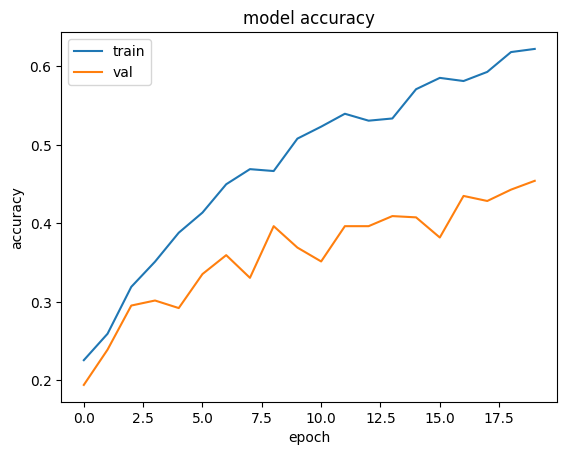

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()